In [1]:
from autocluster import AutoCluster
from algorithms import algorithms
from build_config_space import build_config_space
from utils.clusterutils import ClusterUtils

%load_ext autoreload
%autoreload 2

In [2]:
varied, blobs, no_structure, noisy_circles, noisy_moons, aniso = ClusterUtils.generate_sample_data(1500)

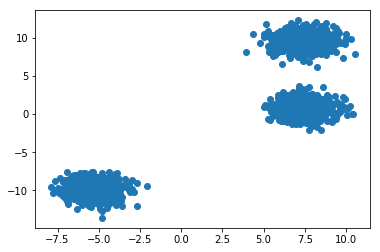

In [3]:
X = blobs[0]
ClusterUtils.visualize_sample_data(X)

In [8]:
autocluster = AutoCluster()
smac_obj, opt_result = autocluster.fit(X, algorithms_ls=['DBSCAN'], n_evaluations=100)

Configuration space object:
  Hyperparameters:
    algorithm_choice, Type: Categorical, Choices: {DBSCAN}, Default: DBSCAN
    eps___DBSCAN, Type: UniformFloat, Range: [0.01, 10.0], Default: 0.01
    min_samples___DBSCAN, Type: UniformInteger, Range: [5, 1000], Default: 5
  Conditions:
    eps___DBSCAN | algorithm_choice in {'DBSCAN'}
    min_samples___DBSCAN | algorithm_choice in {'DBSCAN'}

Optimization is complete, the optimal configuration is Configuration:
  algorithm_choice, Value: 'DBSCAN'
  eps___DBSCAN, Value: 1.5072839799070739
  min_samples___DBSCAN, Value: 161



In [9]:
opt_result

Configuration:
  algorithm_choice, Value: 'DBSCAN'
  eps___DBSCAN, Value: 1.5072839799070739
  min_samples___DBSCAN, Value: 161

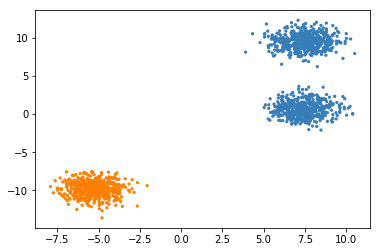

array([0, 0, 0, ..., 0, 1, 1])

In [10]:
autocluster.predict(X)

In [11]:
smac_obj.get_trajectory()

[TrajEntry(train_perf=2147483648, incumbent_id=1, incumbent=Configuration:
   algorithm_choice, Value: 'DBSCAN'
   eps___DBSCAN, Value: 0.01
   min_samples___DBSCAN, Value: 5
 , ta_runs=0, ta_time_used=0, wallclock_time=0.0007169246673583984),
 TrajEntry(train_perf=0.8516401811599096, incumbent_id=1, incumbent=Configuration:
   algorithm_choice, Value: 'DBSCAN'
   eps___DBSCAN, Value: 0.01
   min_samples___DBSCAN, Value: 5
 , ta_runs=1, ta_time_used=0.2220146656036377, wallclock_time=0.2491774559020996),
 TrajEntry(train_perf=-0.7486288969273059, incumbent_id=2, incumbent=Configuration:
   algorithm_choice, Value: 'DBSCAN'
   eps___DBSCAN, Value: 0.28499908336170116
   min_samples___DBSCAN, Value: 404
 , ta_runs=12, ta_time_used=2.602013111114502, wallclock_time=9.26357364654541),
 TrajEntry(train_perf=-0.8045283966369224, incumbent_id=3, incumbent=Configuration:
   algorithm_choice, Value: 'DBSCAN'
   eps___DBSCAN, Value: 1.5072839799070739
   min_samples___DBSCAN, Value: 161
 , ta_ru